<a href="https://colab.research.google.com/github/ruben9324/curso-series-temporales/blob/master/05_Ruben_Antuna_Herrero_AnalisisSentimiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install emosent-py
!pip install emoji_extractor
!pip install emoji
!pip install vaderSentiment
from textblob import TextBlob
!wget https://www.clarin.si/repository/xmlui/handle/11356/1048/allzip
!unzip allzip
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('opinion_lexicon')
nltk.download('subjectivity')
nltk.download('vader_lexicon')
nltk.download('wordnet')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for emosent-py: filename=emosent_py-0.1.6-py3-none-any.whl size=28502 sha256=c1a7fa92879c938fb0cfaead3528367b908a176906b011a2520b1ac0a1f5e214
  Stored in directory: /root/.cache/pip/wheels/32/37/bd/b4e67490f36c4beb85a1047d6cd13a356ffecbfa854eaf4688
Successfully built emosent-py
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for emoji-extractor: filename=emoji_extractor-1.0.20-py3-none-any.whl size=63580 sha256=3e617f83b18dc39f96142aa968e09c5e03e768311e9fa6f417683c78de3943a0
  Stored in directory: /root/.cache/pip/wheels/c9/3a/10/4d60270bd4c7b1569ee392d611fbcbefc2af7d7245163913e3
Successfully built emoji-extractor
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 175 kB 5.2 MB/s 
  Created wheel for emoji: filename=emoj

True

In [2]:
import pandas as pd

Leemos y procesamos el diccionario de "Emoji Sentiment"

In [3]:
# Preparar diccionario de emojis
def load_emoji_sentiment(path):
  # Cargamos el csv de emoji_sentiment
  emoji_sent_df = pd.read_csv(path,sep=",")
  # Calculamos los scores dividiendo el número de emojis negativos y entre el total
  emoji_sent_df["Negative"] = emoji_sent_df["Negative"]/emoji_sent_df["Occurrences"]
  emoji_sent_df["Neutral"] = emoji_sent_df["Neutral"]/emoji_sent_df["Occurrences"]
  emoji_sent_df["Positive"] = emoji_sent_df["Positive"]/emoji_sent_df["Occurrences"]
  # Transformamos a dict
  emoji_sent_df = emoji_sent_df.set_index('Emoji')
  emoji_dict = emoji_sent_df.to_dict(orient="index")
  return emoji_dict

emoji_dict = load_emoji_sentiment("Emoji_Sentiment_Data_v1.0.csv")

In [5]:
emoji_dict

{'¦': {'Negative': 0.175,
  'Neutral': 0.025,
  'Occurrences': 40,
  'Position': 0.402048475,
  'Positive': 0.8,
  'Unicode block': 'Latin-1 Supplement',
  'Unicode codepoint': '0xa6',
  'Unicode name': 'BROKEN BAR'},
 '©': {'Negative': 0.12980769230769232,
  'Neutral': 0.6225961538461539,
  'Occurrences': 416,
  'Position': 0.740148376,
  'Positive': 0.24759615384615385,
  'Unicode block': 'Latin-1 Supplement',
  'Unicode codepoint': '0xa9',
  'Unicode name': 'COPYRIGHT SIGN'},
 '®': {'Negative': 0.06569343065693431,
  'Neutral': 0.583941605839416,
  'Occurrences': 137,
  'Position': 0.353084876,
  'Positive': 0.35036496350364965,
  'Unicode block': 'Latin-1 Supplement',
  'Unicode codepoint': '0xae',
  'Unicode name': 'REGISTERED SIGN'},
 '҂': {'Negative': 1.0,
  'Neutral': 0.0,
  'Occurrences': 1,
  'Position': 0.519230769,
  'Positive': 0.0,
  'Unicode block': 'Cyrillic',
  'Unicode codepoint': '0x482',
  'Unicode name': 'CYRILLIC THOUSANDS SIGN'},
 '۞': {'Negative': 0.0,
  'Neutra

# Extracción de sentimiento

Hemos comentado que se puede extraer la componente de sentimiento de varias formas:
- Con librerías externas que tienen modelos pre-entrenados (textblob)
- Con diccionarios de sentimiento (sentiment lexicons)
- A traves de los emojis presentes en el texto

In [6]:
frase_no_emoji = "I love that my phone can just combine emojis. I don't like the lack of nice apps."
frase_emoji = "I love that my phone can just combine emojis 😍😺👏. I don't like the lack of nice apps."


## TextBlob

Esta librería es muy sencilla y algo similar a Spacy. A partir de un texto puedes calcular múltiples parámetros entre los que se encuentra el sentimiento. Para ello, sólo hay que importar la clase TextBlob que se aplica a nuestro texto, y después podríamos extraer el sentimiento que tiene: tanto la polaridad como la subjetividad:
```
testimonial = TextBlob("Textblob is amazingly simple to use. What great fun!")
testimonial.sentiment
```



In [7]:
frase_no_emoji_blob = TextBlob(frase_no_emoji)
frase_emoji_blob = TextBlob(frase_emoji)
print(frase_no_emoji_blob.sentiment)
print(frase_emoji_blob.sentiment)

Sentiment(polarity=0.55, subjectivity=0.8)
Sentiment(polarity=0.55, subjectivity=0.8)


TextBlob omite el emoticono. Podríamos sustituirlo por una frase utilizando un conversor. PAra eso hay que extraer el emoji y sustituirlo por su descripción:


In [8]:
from emoji_extractor.extract import Extractor
extract = Extractor()
emojis = extract.count_emoji(frase_emoji, check_first=False)
emojis_list = [key for key, _ in emojis.most_common()]
emojis_list


['😍', '😺', '👏']

Hemos extraid emojis de un texto, ahora vamos a sustituirlos por su descripción con la librería "emoji":

In [10]:
import emoji
import string
emojis_description = emoji.demojize(" ".join(emojis_list))
emojis_description

':smiling_face_with_heart-eyes: :grinning_cat: :clapping_hands:'

In [11]:
emojis_desc_final = emojis_description.replace(":", "")
emojis_desc_final


'smiling_face_with_heart-eyes grinning_cat clapping_hands'

In [12]:
emojis_desc_final = emojis_desc_final.replace("_"," ")
emojis_desc_final

'smiling face with heart-eyes grinning cat clapping hands'

Lematizamos (también podemos con Text Blob!)

In [13]:
from textblob import Word 
emojis_blob = emojis_desc_final.split()
emojis_lemmas = [Word(x).lemmatize("v") for x in emojis_blob]
emojis_lemmas = " ".join(emojis_lemmas)
emojis_lemmas

'smile face with heart-eyes grin cat clap hand'

In [14]:
final_emoji_sentence = TextBlob(frase_emoji+ " " +emojis_lemmas)
print(frase_no_emoji_blob.sentiment)
print(final_emoji_sentence.sentiment)

Sentiment(polarity=0.55, subjectivity=0.8)
Sentiment(polarity=0.46666666666666673, subjectivity=0.5666666666666668)


El valor de la polaridad es menor, porque aunque el token "smile tiene una polaridad positiva" el resto de token introducidos no tienen sentimiento, por lo que el promedio baja.

También se pueden utilizar la librería NLTK para algo similar con la función 'nltk.sentiment.util.demo_liu_hu_lexicon(frase_emoji)', que devuelve un valor de "positivo","negativo" o "neutro".

In [16]:
from nltk.sentiment.vader import SentiText,SentimentIntensityAnalyzer #https://github.com/cjhutto/vaderSentiment
sentsss=SentimentIntensityAnalyzer()
sentsss

In [17]:
print(sentsss.polarity_scores(frase_emoji))
print(sentsss.polarity_scores(frase_no_emoji) )

{'neg': 0.091, 'neu': 0.52, 'pos': 0.388, 'compound': 0.7815}
{'neg': 0.096, 'neu': 0.498, 'pos': 0.406, 'compound': 0.7815}


Positive


/usr/local/lib/python3.7/dist-packages/nltk/sentiment/util.py:252: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes = plt.axes()
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128079 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128079 missing from current font.
  font.set_text(s, 0, flags=flags)


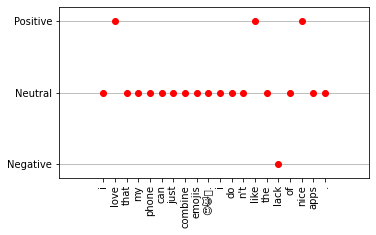

In [20]:
from pickle import TRUE
from nltk.sentiment.util import demo_liu_hu_lexicon
demo_liu_hu_lexicon(frase_emoji, plot = True)